In [2]:
import pandas as pd

# Specify the file path
file_path = "/home/martin/Documents/Exjobb/eed/.data/augmented_data/train/augmented_data_0_noise_0_train.parquet"

# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
df["label"] = df["label"].astype(int)

In [15]:
df.describe()


0                               lookAtPoint_EL_S1.npy
1                               lookAtPoint_EL_S1.npy
2                               lookAtPoint_EL_S1.npy
3                               lookAtPoint_EL_S1.npy
4                               lookAtPoint_EL_S1.npy
                             ...                     
484777    TH38_video_dolphin_fov_labelled_RA_data.npy
484778    TH38_video_dolphin_fov_labelled_RA_data.npy
484779    TH38_video_dolphin_fov_labelled_RA_data.npy
484780    TH38_video_dolphin_fov_labelled_RA_data.npy
484781    TH38_video_dolphin_fov_labelled_RA_data.npy
Name: file_name, Length: 484782, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484782 entries, 0 to 484781
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   t             484782 non-null  float64
 1   x             468410 non-null  float64
 2   y             468410 non-null  float64
 3   status        484782 non-null  bool   
 4   label         484782 non-null  int64  
 5   file_index    484782 non-null  int64  
 6   file_name     484782 non-null  object 
 7   fs            484782 non-null  int64  
 8   mean-diff-x   484782 non-null  float64
 9   med-diff-x    484782 non-null  float64
 10  std-pre-x     484782 non-null  float64
 11  std-post-x    484782 non-null  float64
 12  mean-diff-y   484782 non-null  float64
 13  med-diff-y    484782 non-null  float64
 14  std-pre-y     484782 non-null  float64
 15  std-post-y    484782 non-null  float64
 16  std-x         484782 non-null  float64
 17  std-y         484782 non-null  float64
 18  std 

### Distribution of labels

label
0      1533
1    377479
2     31191
3     16123
4     30512
5     27944
Name: count, dtype: int64
Percentage of fixations:  77.87 %
Percentage of saccades:  6.43 %


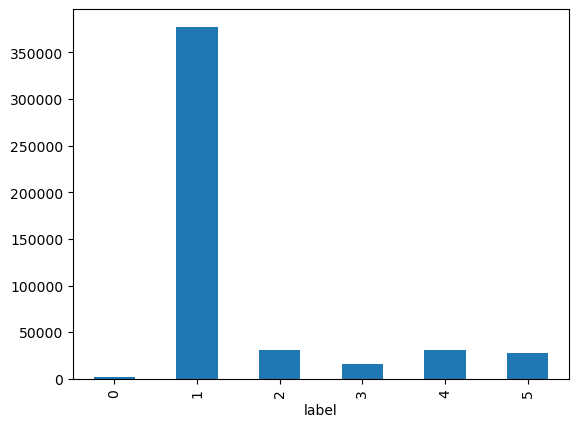

In [5]:
df['label'].value_counts().sort_index().plot(kind='bar')
print(df['label'].value_counts().sort_index())
fixation_percentage = round((df['label'].value_counts().sort_index()[1] / df['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df['label'].value_counts().sort_index()[2] / df['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


### Distribution of labels when only looking at fixations and saccades

label
1    424114
2     31191
Name: count, dtype: int64
Percentage of fixations:  93.15 %
Percentage of saccades:  6.85 %


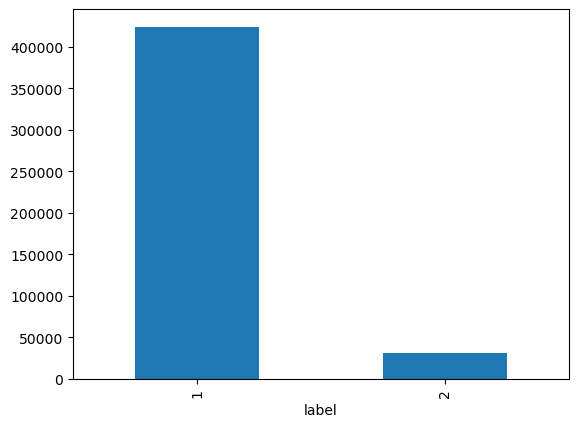

In [6]:
df_na_dropped = df.dropna()
# Reassign labels 3 and 4 to label 1
df_na_dropped.loc[:, 'label'] = df_na_dropped['label'].replace({3: 1, 4: 1})

# Remove samples with label 1 and 5
df_na_dropped = df_na_dropped[(df_na_dropped['label'] != 5) & (df_na_dropped['label'] != 0)]

df_na_dropped['label'].value_counts().sort_index().plot(kind='bar')
print(df_na_dropped['label'].value_counts().sort_index())
fixation_percentage = round((df_na_dropped['label'].value_counts().sort_index()[1] / df_na_dropped['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df_na_dropped['label'].value_counts().sort_index()[2] / df_na_dropped['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


In [7]:
features = df_na_dropped.drop(columns=['label',"x", "y","t", "status", "file_index", "file_name"])
features.describe()

fs    mean-diff-x     med-diff-x      std-pre-x     std-post-x  \
count  455305.0  455305.000000  455305.000000  455305.000000  455305.000000   
mean     1000.0      -2.198859      -2.843001      24.997755      25.691577   
std         0.0     100.323252     115.549881      60.437282      61.271477   
min      1000.0    -709.377113    -834.151500       0.016029       0.016029   
25%      1000.0      -2.839457      -1.476695       0.048195       0.048106   
50%      1000.0      -0.018615      -0.014820       0.451851       0.460921   
75%      1000.0       1.615730       0.459200      16.294153      15.434234   
max      1000.0     653.535564     813.677550    1196.789967    1196.489772   

         mean-diff-y     med-diff-y      std-pre-y     std-post-y  \
count  455305.000000  455305.000000  455305.000000  455305.000000   
mean       -0.284292      -0.503812      16.374080      16.640640   
std        65.472597      75.925265      58.002696      56.387293   
min      -480.730178    -652.986300       0.018830       0.018830   
25%        -1.937649      -0.497172       0.048650       0.048429   
50%        -0.011102      -0.016169       0.341942       0.349495   
75%         2.296130       0.909461       8.363644       8.178642   
max       523.615993     594.532800    1305.740958    1305.575129   

               std-x  ...            std       std-diff          bcea  \
count  455305.000000  ...  455305.000000  455305.000000  4.553050e+05   
mean       23.823715  ...      30.242369       0.592440  8.521638e+03   
std        52.515222  ...      67.344805      94.349338  1.027120e+05   
min         0.016089  ...       0.027798   -1720.127177  2.651922e-03   
25%         0.048171  ...       0.071682      -3.808583  1.448962e-02   
50%         0.412857  ...       0.869970      -0.011777  4.610504e-01   
75%        15.512460  ...      23.596281       3.130035  6.268827e+02   
max      1189.819391  ...    1752.431481    1754.454726  7.301570e+06   

          bcea_diff            rms       rms-diff           disp  \
count  4.553050e+05  455305.000000  455305.000000  455305.000000   
mean   4.795424e+02     244.870493       2.613169     140.074056   
std    2.807418e+05     338.224154      89.970926     540.980697   
min   -7.728686e+06       0.117145    -944.368986       0.218273   
25%   -6.599803e+00      12.041168      -1.438372       0.479656   
50%   -3.051555e-03      18.779919       0.007233       4.578290   
75%    5.256404e+00     573.796664       2.500851     108.888000   
max    7.652687e+06    2052.688960    1071.708664   18914.350800   

                 vel           acc   rayleightest  
count  455305.000000  4.553050e+05   4.553050e+05  
mean     1105.229721  1.361567e+06   2.647218e-04  
std      6295.412458  1.154110e+07   1.208680e-02  
min        23.384182  3.953394e+04  9.821287e-110  
25%        37.164174  5.928717e+04  9.854158e-110  
50%        62.914457  7.762048e+04  1.026594e-109  
75%      1069.925496  1.050438e+06  1.597313e-108  
max    333219.929680  6.281835e+08   9.957603e-01  

[8 rows x 21 columns]

## PCA analysis of features

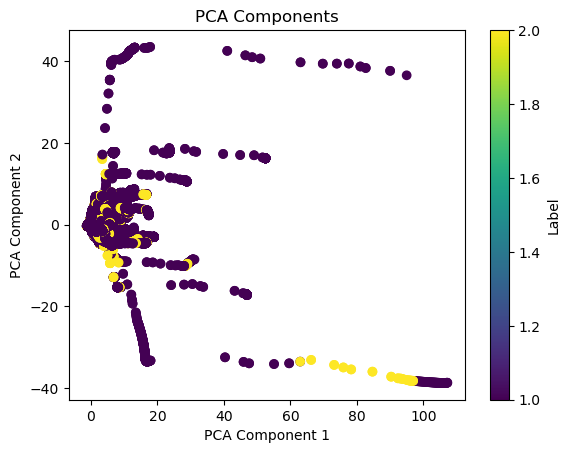

In [8]:
# Perform PCA with 2 components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Perform PCA on the normalized features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_features)

# Create a scatter plot of the PCA components, color-coded by labels
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_na_dropped["label"])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.colorbar(label='Label')
plt.show()


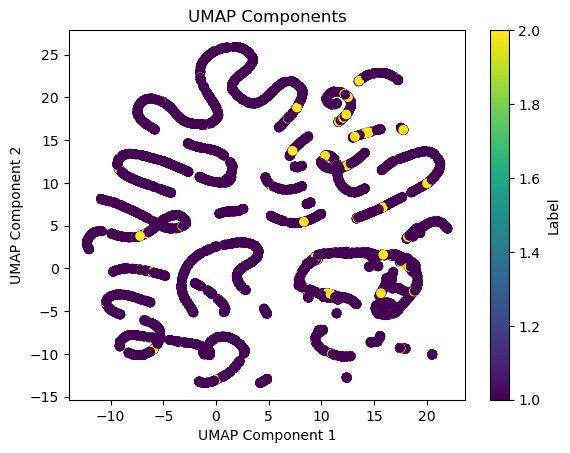

In [30]:
import umap as umap

# Sample 1000 samples
sample_df = df_na_dropped.sample(n=10000, random_state=42)

# Perform UMAP with 2 components on the sampled data
umap_components = umap.UMAP(n_components=2).fit_transform(sample_df[features.columns])

# Create a scatter plot of the UMAP components, color-coded by labels
plt.scatter(umap_components[:, 0], umap_components[:, 1], c=sample_df["label"])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Components')
plt.colorbar(label='Label')
plt.show()


### Sns pairplot

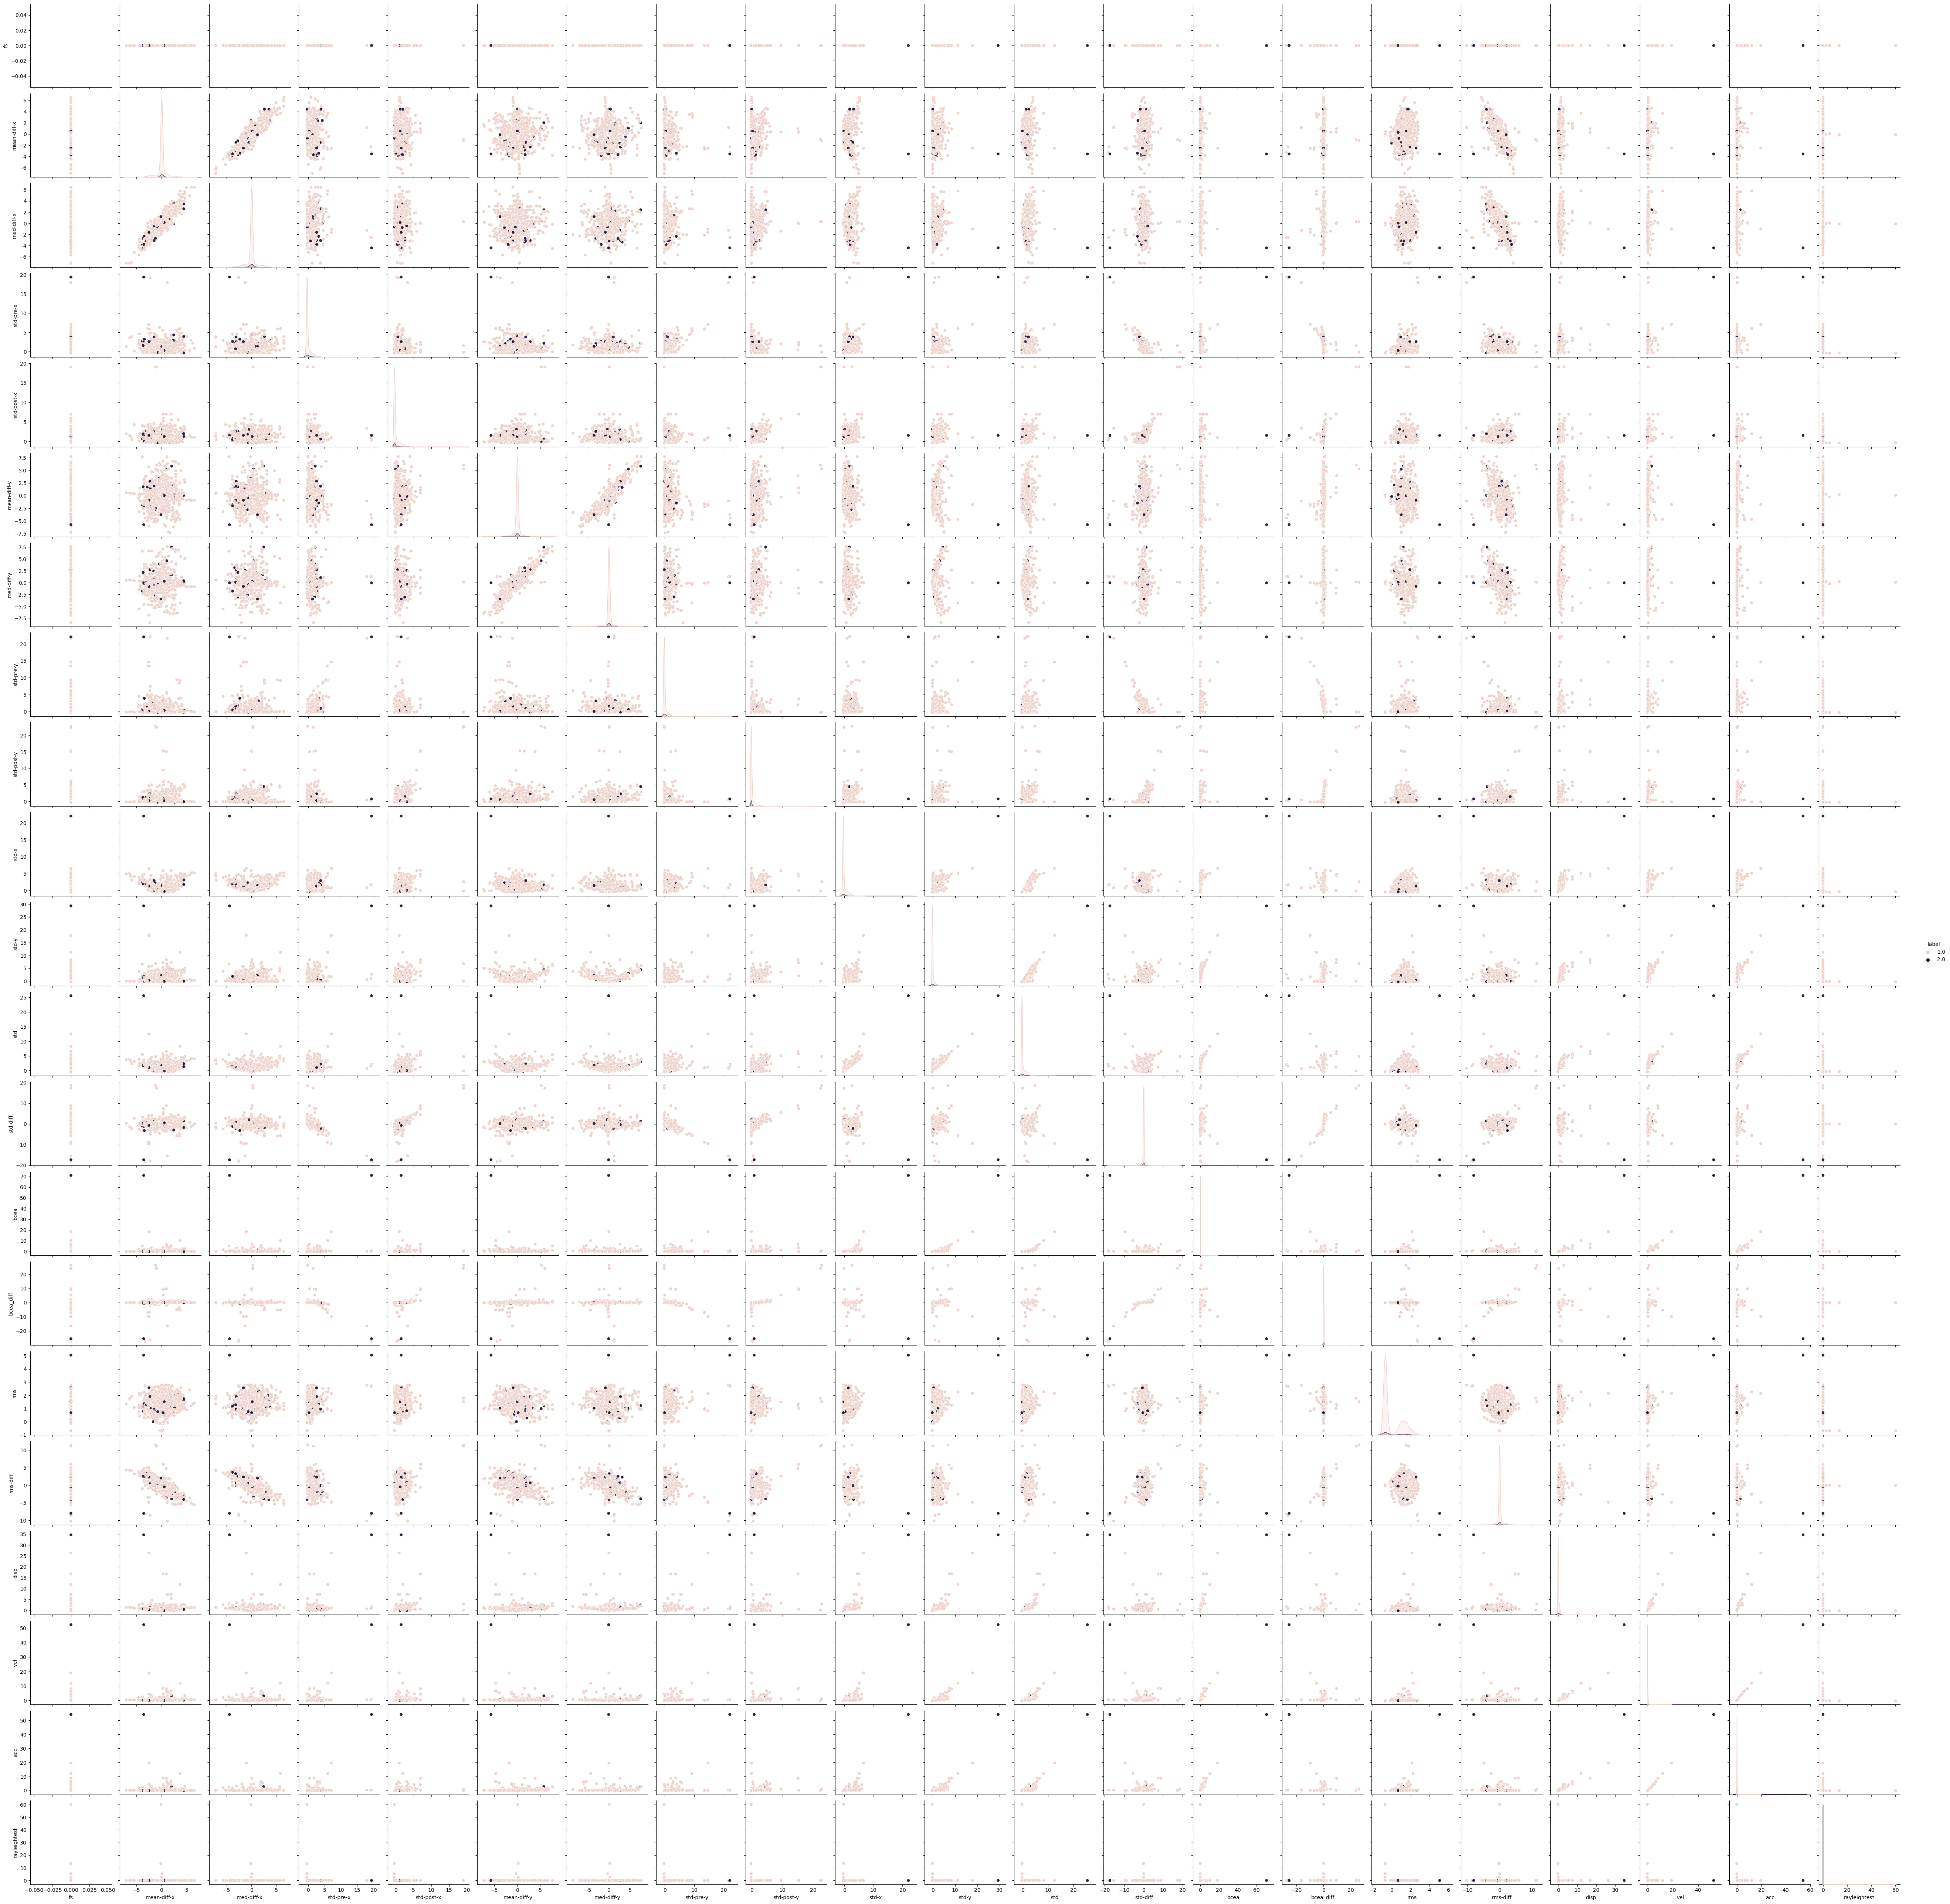

In [33]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
# Concatenate the features and labels into a single DataFrame
df_concat = pd.concat([features, df_na_dropped['label']], axis=1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_concat.iloc[:, :-1])

# Create a DataFrame with the normalized features and label
normalized_df = pd.DataFrame(normalized_features, columns=df_concat.columns[:-1])
normalized_df['label'] = df_concat['label']

# Randomly extract a subset of the data
subset_df = normalized_df.sample(n = 5000, random_state=42)

# Create a pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(subset_df, hue='label')


## Print correlations between features

In [27]:
correlation_matrix = features.corr()
correlation_ranking = correlation_matrix.unstack().sort_values(ascending=False)
correlation_ranking = correlation_ranking[correlation_ranking != 1]
pd.options.display.max_rows = 4000
print(correlation_ranking[1:400])


acc           vel             0.993609
              bcea            0.956306
bcea          acc             0.956306
std-x         std             0.953850
std           std-x           0.953850
vel           bcea            0.949133
bcea          vel             0.949133
med-diff-x    mean-diff-x     0.927224
mean-diff-x   med-diff-x      0.927224
disp          vel             0.921311
vel           disp            0.921311
med-diff-y    mean-diff-y     0.912605
mean-diff-y   med-diff-y      0.912605
acc           disp            0.891513
disp          acc             0.891513
              std-y           0.873669
std-y         disp            0.873669
std           std-y           0.866702
std-y         std             0.866702
disp          bcea            0.846729
bcea          disp            0.846729
std           disp            0.831954
disp          std             0.831954
bcea_diff     std-diff        0.814007
std-diff      bcea_diff       0.814007
vel           std-y      

## Plot distributions of different features for saccades and fixations 

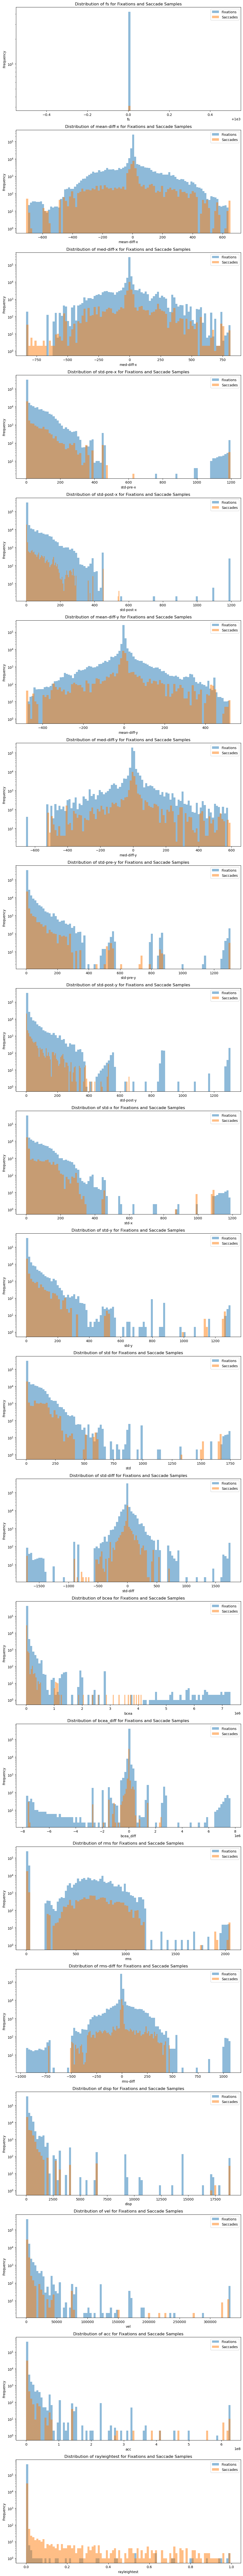

In [ ]:
import matplotlib.pyplot as plt

# Get the list of feature column names
feature_columns = list(features.columns)

# Set the number of rows and columns for the subplots
num_rows = len(feature_columns)
num_cols = 1

# Create subplots for each feature
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

# Iterate over the feature columns
for i, feature in enumerate(feature_columns):
    # Extract samples where the label is 1
    label_1_samples = df_na_dropped[df_na_dropped['label'] == 1]

    # Extract samples where the label is 2
    label_2_samples = df_na_dropped[df_na_dropped['label'] == 2]

    # Plot the distribution of the feature for label 1 samples
    axs[i].hist(label_1_samples[feature], bins=100,alpha=0.5, label='Fixations')
    axs[i].hist(label_2_samples[feature], bins=100,alpha=0.5, label='Saccades')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {feature} for Fixations and Saccade Samples')
    axs[i].set_yscale('log')
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Variable importance with random forest


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your data
rf_classifier.fit(features, df_na_dropped['label'])

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


         Feature  Importance
11           std    0.083862
12      std-diff    0.080648
3      std-pre-x    0.067082
9          std-x    0.065225
4     std-post-x    0.058757
7      std-pre-y    0.056780
8     std-post-y    0.052629
14     bcea_diff    0.052353
1    mean-diff-x    0.050533
10         std-y    0.049077
5    mean-diff-y    0.048516
13          bcea    0.046299
15           rms    0.045500
16      rms-diff    0.042294
17          disp    0.042042
18           vel    0.041148
2     med-diff-x    0.036266
6     med-diff-y    0.036134
19           acc    0.032207
20  rayleightest    0.012649
0             fs    0.000000
